In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/housing.csv')


In [ ]:
 data.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [ ]:
data.shape

(20640, 11)

['male' 'female' nan]


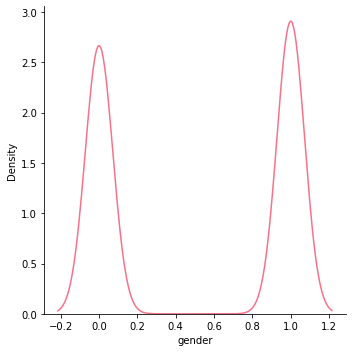

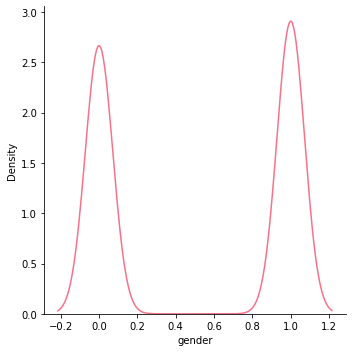

In [ ]:
print((data['gender']).unique()) 
#categories : male & female 
# 2 categories only treated as binary better go for numeric encoding and to fill the nans with -999
handeled_data=data.replace({'gender':{'male':0,'female':1}})
#distribution before filling nans 
sns.set_palette("husl")
sns.displot(data=handeled_data, x="gender", kind="kde")
#filling the nans with -999
handeled_data.fillna({"gender":-999})
#making sure no nans in col gender 
handeled_data["gender"].isnull().sum()
#distribution after filling nans 
sns.set_palette("husl")
sns.displot(data=handeled_data, x="gender", kind="kde")


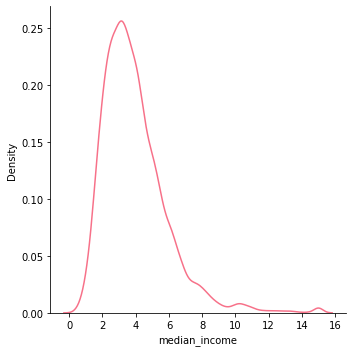

In [ ]:
sns.set_palette("husl")
sns.displot(data=handeled_data, x="median_income", kind="kde")

In [ ]:
handeled_data["median_income"].fillna(handeled_data["median_income"].median(), inplace=True)

In [ ]:
handeled_data["median_income"].isnull().sum()

0

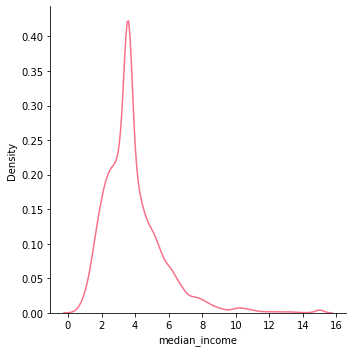

In [ ]:
sns.set_palette("husl")
sns.displot(data=handeled_data, x="median_income", kind="kde")

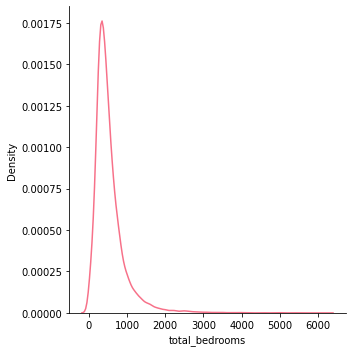

In [ ]:
sns.set_palette("husl")
sns.displot(data=handeled_data, x="total_bedrooms", kind="kde")

In [ ]:
handeled_data["total_bedrooms"].fillna(handeled_data["total_bedrooms"].mode(), inplace=True)

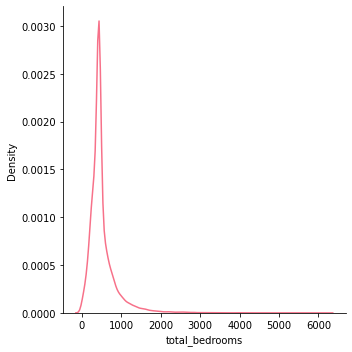

In [ ]:
sns.set_palette("husl")
sns.displot(data=handeled_data, x="total_bedrooms", kind="kde")

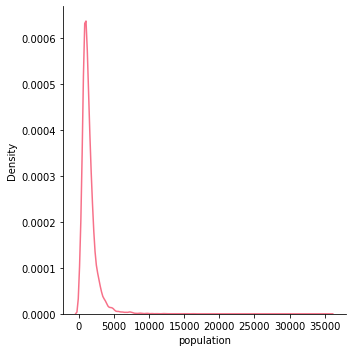

In [ ]:
sns.set_palette("husl")
sns.displot(data=handeled_data, x="population", kind="kde")

In [ ]:
handeled_data["population"].fillna(handeled_data["population"].mean(), inplace=True)

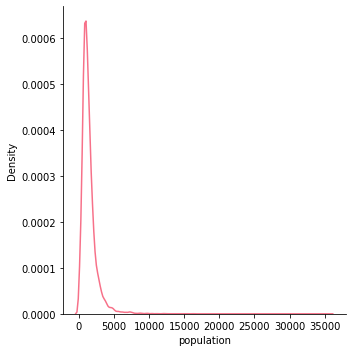

In [ ]:
sns.set_palette("husl")
sns.displot(data=handeled_data, x="population", kind="kde")

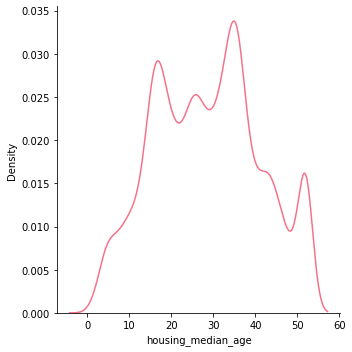

In [ ]:
#housing_median_age
sns.set_palette("husl")
sns.displot(data=handeled_data, x="housing_median_age", kind="kde")

In [ ]:
handeled_data["housing_median_age"].fillna(handeled_data["housing_median_age"].mean(), inplace=True)

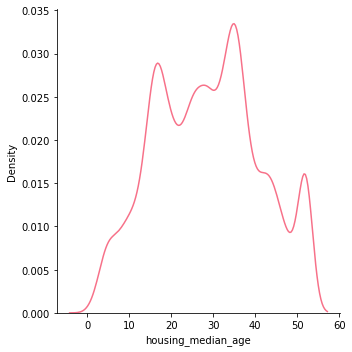

In [ ]:
sns.set_palette("husl")
sns.displot(data=handeled_data, x="housing_median_age", kind="kde")

In [ ]:
#households contain diff categories so it needs one hot encoding 
handeled_data_2=pd.get_dummies(handeled_data)
handeled_data_2.dtypes
print(handeled_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Columns: 1717 entries, longitude to ocean_proximity_NEAR OCEAN
dtypes: float64(7), int64(2), uint8(1708)
memory usage: 35.0 MB
None


In [ ]:
handeled_data_2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value,gender,households_1,...,households_994,households_995,households_997,households_998,households_no,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,16620.000000,20640.000000,...,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.676283,2635.763081,515.103246,1424.928724,3.892173,206855.816909,0.521841,0.000048,...,0.000145,0.000097,0.000388,0.000145,0.149225,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.510350,2181.615252,369.534288,1131.030223,1.812530,115395.615874,0.499538,0.006961,...,0.012055,0.009844,0.019684,0.012055,0.356319,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,338.000000,788.000000,2.741250,119600.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1167.000000,3.587100,179700.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,566.000000,1723.000000,4.583300,264725.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#handeled_data_2.drop(handeled_data_2[handeled_data_2['Departure Delay']>550].index, axis = 0, inplace =False)
df=handeled_data_2
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

longitude                        3.79
latitude                         3.78
housing_median_age              19.00
total_rooms                   1700.25
total_bedrooms                 228.00
                               ...   
ocean_proximity_<1H OCEAN        1.00
ocean_proximity_INLAND           1.00
ocean_proximity_ISLAND           0.00
ocean_proximity_NEAR BAY         0.00
ocean_proximity_NEAR OCEAN       0.00
Length: 1717, dtype: float64


In [ ]:
df.drop(df[(df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))==1.0].index, inplace =False)
#df.drop(df[df['Fee'] >= 24000].index, inplace = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value,gender,households_1,...,households_994,households_995,households_997,households_998,households_no,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN


3.8681683556439768


<AxesSubplot:>

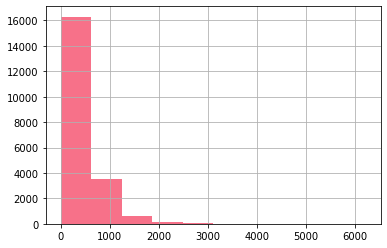

In [ ]:
print(df['total_bedrooms'].skew())
df.total_bedrooms.hist()

4.950338681020185


<AxesSubplot:>

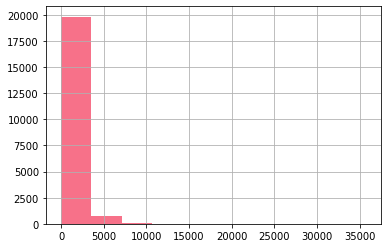

In [ ]:
print(df['population'].skew())
df.population.hist()

4.147343450632158


<AxesSubplot:>

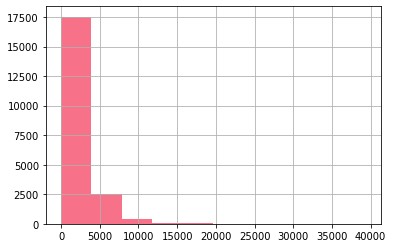

In [ ]:
print(df['total_rooms'].skew())
df.total_rooms.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# generate 1000 out_df points randomly drawn from an exponential distribution
df = np.random.exponential(size = 1000).reshape(-1, 1)
scaler = MinMaxScaler()
#scale the out_df between 0 and 1
scaled_out_df = scaler.fit_transform(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled out_df')

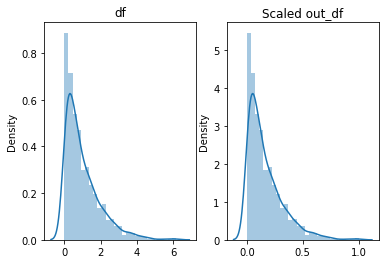

In [ ]:
fig, ax=plt.subplots(1,2)
sns.distplot(df, ax=ax[0])
ax[0].set_title("df")
sns.distplot(scaled_out_df, ax=ax[1])
ax[1].set_title("Scaled out_df")